## The Sparks Foundation Internship - Task 2
### Done by - Amal Mohamed Ashraf
#### Prediction using Unsupervised ML
##### Problem Statement
From the given 'iris' dataset, predict the optimum number of clusters and represent it  visually

In [1]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Loading the  Iris datasets
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)


In [3]:
#Printing first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

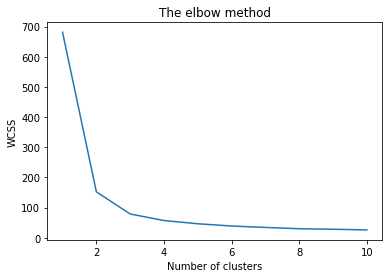

In [5]:
# finding the optimum number of clusters for k mean classificaton

x=df.iloc[:,:].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Plotting the result onto a line graph
#allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#from above graph optimum clusters is where  the elbow occurs.
#This is when the within cluster sum of squares(wcss) doesn't decrease significantly with every iteration.


In [6]:
#Applying kmeans to the dataset / creating the kmeans classifier
kmeans=KMeans(n_clusters=3,init='k-means++',
             max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

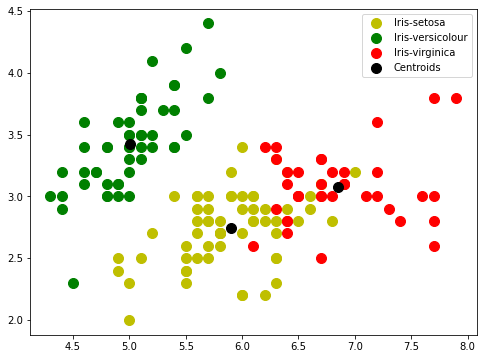

In [7]:
#Visualising the clusters - On the first two columns
plt.figure(figsize=(8, 6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='y',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='g',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='r',label='Iris-virginica')

#plotting the centroid of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='black',label='Centroids')

plt.legend();